In [2]:
import requests
import pandas as pd
import time

In [3]:
api_key = "2253c8b68c19277b03354849a884718f"  
base_url = "https://api.themoviedb.org/3/movie/popular"
all_movies = []

for page in range(1, 501):  # adjust max pages as needed
    url = f"{base_url}?api_key={api_key}&language=en-US&page={page}"
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to fetch page {page}")
        break
    data = response.json()
    results = data.get('results', [])
    if not results:
        break

    for movie in results:
        movie_id = movie.get('id')
        title = movie.get('title')
        overview = movie.get('overview')
        release_date = movie.get('release_date')
        popularity = movie.get('popularity')
        vote_average = movie.get('vote_average')
        genres_list = []

        movie_detail_url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}&language=en-US"
        detail_resp = requests.get(movie_detail_url).json()
        genres_list = [g['name'] for g in detail_resp.get('genres', [])]

        all_movies.append({
            "movie_id": movie_id,
            "title": title,
            "genres": ",".join(genres_list),
            "overview": overview,
            "release_date": release_date,
            "popularity": popularity,
            "vote_average": vote_average
        })

    print(f"Fetched page {page} with {len(results)} movies")
    time.sleep(0.25)  
    
df = pd.DataFrame(all_movies)
df.to_csv("tmdb_full_dataset.csv", index=False)
print(f"Total movies fetched: {len(df)}")

Fetched page 1 with 20 movies
Fetched page 2 with 20 movies
Fetched page 3 with 20 movies
Fetched page 4 with 20 movies
Fetched page 5 with 20 movies
Fetched page 6 with 20 movies
Fetched page 7 with 20 movies
Fetched page 8 with 20 movies
Fetched page 9 with 20 movies
Fetched page 10 with 20 movies
Fetched page 11 with 20 movies
Fetched page 12 with 20 movies
Fetched page 13 with 20 movies
Fetched page 14 with 20 movies
Fetched page 15 with 20 movies
Fetched page 16 with 20 movies
Fetched page 17 with 20 movies
Fetched page 18 with 20 movies
Fetched page 19 with 20 movies
Fetched page 20 with 20 movies
Fetched page 21 with 20 movies
Fetched page 22 with 20 movies
Fetched page 23 with 20 movies
Fetched page 24 with 20 movies
Fetched page 25 with 20 movies
Fetched page 26 with 20 movies
Fetched page 27 with 20 movies
Fetched page 28 with 20 movies
Fetched page 29 with 20 movies
Fetched page 30 with 20 movies
Fetched page 31 with 20 movies
Fetched page 32 with 20 movies
Fetched page 33 w

In [20]:
df

,movie_id,title,genres,overview,release_date,popularity,vote_average,genres_list,,Action,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,617126,The Fantastic 4: First Steps,"Science Fiction,Adventure",Against the vibrant backdrop of a 1960s-inspir...,2025-07-22,742.1079,7.200,"[Science Fiction, Adventure]",0,0,...,0,0,0,0,0,1,0,0,0,0
1,1311031,Demon Slayer: Kimetsu no Yaiba Infinity Castle,"Animation,Action,Fantasy,Thriller",The Demon Slayer Corps are drawn into the Infi...,2025-07-18,511.9346,7.784,"[Animation, Action, Fantasy, Thriller]",0,1,...,0,0,0,0,0,0,0,1,0,0
2,755898,War of the Worlds,"Science Fiction,Thriller",Will Radford is a top analyst for Homeland Sec...,2025-07-29,438.9557,4.404,"[Science Fiction, Thriller]",0,0,...,0,0,0,0,0,1,0,1,0,0
3,1267319,Mantis,"Action,Crime,Thriller","Mantis, an ace assassin, returns to the contra...",2025-09-26,357.2003,6.000,"[Action, Crime, Thriller]",0,1,...,0,0,0,0,0,0,0,1,0,0
4,1009640,Valiant One,"Action,War","With tensions between North and South Korea, a...",2025-01-30,302.9889,6.250,"[Action, War]",0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,83090,Saint Seiya: Evil Goddess Eris,"Action,Animation,Fantasy","When Seiya, Hyōga and Shun visit Saori (Athena...",1987-07-18,4.7312,7.100,"[Action, Animation, Fantasy]",0,1,...,0,0,0,0,0,0,0,0,0,0
9996,13885,Sweeney Todd: The Demon Barber of Fleet Street,"Drama,Horror","The infamous story of Benjamin Barker, a.k.a S...",2007-12-20,4.8958,7.179,"[Drama, Horror]",0,0,...,0,1,0,0,0,0,0,0,0,0
9997,1158507,The Women In The House Of Different Dimensions,"Science Fiction,Drama",Two women discover they are living the same li...,,4.8920,0.000,"[Science Fiction, Drama]",0,0,...,0,0,0,0,0,1,0,0,0,0
9998,2642,Two Weeks Notice,"Romance,Comedy",Dedicated environmental lawyer Lucy Kelson goe...,2002-12-19,5.3241,6.368,"[Romance, Comedy]",0,0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
print(df.isnull().sum())
df['overview'] = df['overview'].fillna('')
df['release_date'] = df['release_date'].fillna('1900-01-01')
df['vote_average'] = df['vote_average'].fillna(0)

movie_id           0
title              0
genres             0
overview           0
release_date       0
popularity         0
vote_average       0
genres_list        0
                   0
Action             0
Adventure          0
Animation          0
Comedy             0
Crime              0
Documentary        0
Drama              0
Family             0
Fantasy            0
History            0
Horror             0
Music              0
Mystery            0
Romance            0
Science Fiction    0
TV Movie           0
Thriller           0
War                0
Western            0
dtype: int64


In [21]:
#encoding genres
from sklearn.preprocessing import MultiLabelBinarizer

df['genres_list'] = df['genres'].apply(lambda x: x.split(',') if isinstance(x, str) else [])

mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['genres_list'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

df = pd.concat([df, genre_df], axis=1)

print(df.head())


   movie_id                                           title  \
0    617126                    The Fantastic 4: First Steps   
1   1311031  Demon Slayer: Kimetsu no Yaiba Infinity Castle   
2    755898                               War of the Worlds   
3   1267319                                          Mantis   
4   1009640                                     Valiant One   

                              genres  \
0          Science Fiction,Adventure   
1  Animation,Action,Fantasy,Thriller   
2           Science Fiction,Thriller   
3              Action,Crime,Thriller   
4                         Action,War   

                                            overview release_date  popularity  \
0  Against the vibrant backdrop of a 1960s-inspir...   2025-07-22    742.1079   
1  The Demon Slayer Corps are drawn into the Infi...   2025-07-18    511.9346   
2  Will Radford is a top analyst for Homeland Sec...   2025-07-29    438.9557   
3  Mantis, an ace assassin, returns to the contra...   2

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
overview_features = tfidf.fit_transform(df['overview'])

In [23]:
overview_features

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 181483 stored elements and shape (10000, 5000)>

In [24]:
movie_features = df[['vote_average', 'popularity'] + list(mlb.classes_)]  # numeric + genre one-hot
movie_features = movie_features.fillna(0)  

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
movie_features[['vote_average', 'popularity']] = scaler.fit_transform(movie_features[['vote_average', 'popularity']])

print("Movie features ready:", movie_features.shape)

Movie features ready: (10000, 42)


In [25]:
movie_features

,vote_average,popularity,,,Action,Action,Adventure,Adventure,Animation,Animation,...,Science Fiction,Science Fiction,TV Movie,TV Movie,Thriller,Thriller,War,War,Western,Western
0,0.7200,1.000000,0,0,0,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,0
1,0.7784,0.688637,0,0,1,1,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0
2,0.4404,0.589915,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,0,0
3,0.6000,0.479322,0,0,1,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0.6250,0.405988,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.7100,0.002525,0,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9996,0.7179,0.002747,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0.0000,0.002742,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
9998,0.6368,0.003327,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
movie_features.to_csv('movie_features.csv')

In [27]:
import numpy as np
from scipy.sparse import hstack

movie_features_array = movie_features.values

from scipy.sparse import csr_matrix
movie_features_sparse = csr_matrix(movie_features_array)

# Combine with TF-IDF overview
X = hstack([movie_features_sparse, overview_features])  # final input matrix
print("Input feature shape:", X.shape)


Input feature shape: (10000, 5042)


In [28]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 243717 stored elements and shape (10000, 5042)>

In [29]:
y = df['vote_average'].values

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert sparse to dense
X_train_tensor = torch.tensor(X_train.toarray(), dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.toarray(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# DataLoaders for batch training
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [55]:
import torch.nn as nn
import torch.nn.functional as F

input_dim = X_train_tensor.shape[1]

class MovieRecNet(nn.Module):
    def __init__(self, input_dim):
        super(MovieRecNet, self).__init__()
        # self.fc1 = nn.Linear(input_dim, 512)
        # self.fc2 = nn.Linear(512, 256)
        # self.fc3 = nn.Linear(256, 1)  # regression output
        # self.dropout = nn.Dropout(0.3)
        self.fc1 = nn.Linear(input_dim, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 128)
        self.fc4 = nn.Linear(128, 1)
        self.dropout = nn.Dropout(0.3)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)   # final output
        return x

model = MovieRecNet(input_dim)

In [56]:
#optimiser
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [57]:
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # optional
        optimizer.step()
        train_loss += loss.item() * X_batch.size(0)
    
    train_loss /= len(train_loader.dataset)
    
    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item() * X_batch.size(0)
    val_loss /= len(val_loader.dataset)
    
    print(f"Epoch {epoch+1}/{num_epochs} — Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")


Epoch 1/10 — Train Loss: 18.5588, Val Loss: 4.4436
Epoch 2/10 — Train Loss: 3.2318, Val Loss: 1.6878
Epoch 3/10 — Train Loss: 0.9073, Val Loss: 0.3721
Epoch 4/10 — Train Loss: 0.4735, Val Loss: 0.1863
Epoch 5/10 — Train Loss: 0.4014, Val Loss: 0.1503
Epoch 6/10 — Train Loss: 0.3851, Val Loss: 0.1187
Epoch 7/10 — Train Loss: 0.3650, Val Loss: 0.1060
Epoch 8/10 — Train Loss: 0.3562, Val Loss: 0.1147
Epoch 9/10 — Train Loss: 0.3413, Val Loss: 0.1082
Epoch 10/10 — Train Loss: 0.3452, Val Loss: 0.1022


In [58]:
# Save the trained model
torch.save(model.state_dict(), "movie_recommender.pth")
print("Model saved successfully!")

Model saved successfully!


In [ ]:
# If training loss ↓ but validation loss ↑ → model is overfitting.
# If both losses stay high → underfitting (model too simple).
# If both decrease smoothly → good fit.

In [59]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_true, y_pred = [], []

model.eval()
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        y_true.extend(y_batch.cpu().numpy())
        y_pred.extend(outputs.cpu().numpy())

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"Epoch {epoch+1}/{num_epochs} — Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

Epoch 10/10 — Train Loss: 0.3452, Val Loss: 0.1022, RMSE: 0.3196, R²: 0.9853


In [62]:
torch.save(model, "movie_recommender_full.pth")

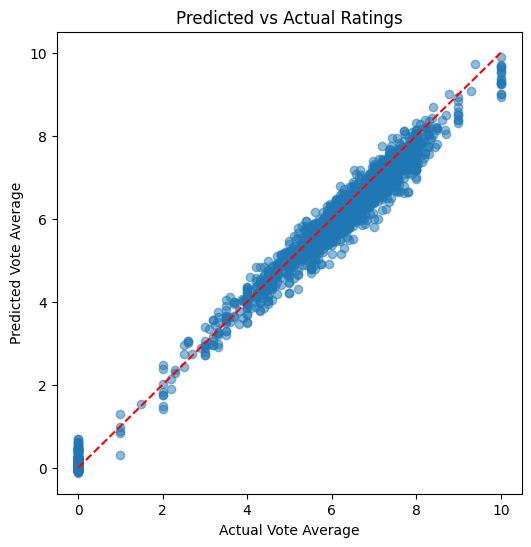

In [63]:
import numpy as np

model.eval()
with torch.no_grad():
    y_val_pred = model(X_val_tensor.to(device)).cpu().numpy().flatten()
    y_val_true = y_val_tensor.cpu().numpy().flatten()

plt.figure(figsize=(6,6))
plt.scatter(y_val_true, y_val_pred, alpha=0.5)
plt.plot([0,10], [0,10], color="red", linestyle="--")  # ideal line
plt.xlabel("Actual Vote Average")
plt.ylabel("Predicted Vote Average")
plt.title("Predicted vs Actual Ratings")
plt.show()

In [66]:
model.eval()
with torch.no_grad():
    X_all_tensor = torch.tensor(X.toarray(), dtype=torch.float32).to(device)
    predicted_scores = model(X_all_tensor).cpu().numpy().flatten()

df['predicted_score'] = predicted_scores
df_unique = df.drop_duplicates(subset='title', keep='first')

top_k = df_unique.sort_values(by='predicted_score', ascending=False).head(10)
print(top_k[['title', 'predicted_score']])

                                            title  predicted_score
9486         Proust ou les Intermittences du cœur        10.539760
7838            Apartment Wife: Night of the Rape        10.347051
269                           GATAO: Big Brothers        10.141290
9211                              Days Like These        10.054293
2821                              Delicious Tutor         9.965743
2815               Invasion of the Not Quite Dead         9.943236
7412              AAA DOME TOUR 2018 COLOR A LIFE         9.938445
2367  Jimmy Two-Jokes and the Defective Detective         9.925056
5952      USS Constellation: Battling for Freedom         9.906821
861                                        Salome         9.888371
